In [ ]:
pip install scikit-learn


In [ ]:
import pandas as pd;
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = "/content/drive/My Drive/diabetesDS.csv"

In [ ]:
#Question1: Load the dataset and rename the columns accordingly.
import pandas as pd

column_names = ['Number_of_times_pregnant', 'Plasma_glucose_concentration', 'Diastolic_blood_pressure',
                'Triceps_skinfold_thickness', '2_Hour_serum_insulin', 'Body_mass_index',
                'Diabetes_pedigree_function', 'Age', 'Class_variable']

dataset = pd.read_csv(dataset, names=column_names)
print(dataset.head())


   Number_of_times_pregnant  Plasma_glucose_concentration  \
0                         6                           148   
1                         1                            85   
2                         8                           183   
3                         1                            89   
4                         0                           137   

   Diastolic_blood_pressure  Triceps_skinfold_thickness  2_Hour_serum_insulin  \
0                        72                          35                     0   
1                        66                          29                     0   
2                        64                           0                     0   
3                        66                          23                    94   
4                        40                          35                   168   

   Body_mass_index  Diabetes_pedigree_function  Age  Class_variable  
0             33.6                       0.627   50               1  
1     

In [ ]:
#Question2: Normalize the data
features = dataset.drop('Class_variable', axis=1)

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply the MinMaxScaler to the features.
normalized_features = scaler.fit_transform(features)

# Create a new DataFrame with the normalized features
normalized_dataset = pd.DataFrame(normalized_features, columns=column_names[:-1])

# Reintegrate the target variable into the DataFrame
normalized_dataset['Class_variable'] = dataset['Class_variable']

# Preview the first few rows of the scaled data.
print(normalized_dataset.head())

   Number_of_times_pregnant  Plasma_glucose_concentration  \
0                  0.352941                      0.743719   
1                  0.058824                      0.427136   
2                  0.470588                      0.919598   
3                  0.058824                      0.447236   
4                  0.000000                      0.688442   

   Diastolic_blood_pressure  Triceps_skinfold_thickness  2_Hour_serum_insulin  \
0                  0.590164                    0.353535              0.000000   
1                  0.540984                    0.292929              0.000000   
2                  0.524590                    0.000000              0.000000   
3                  0.540984                    0.232323              0.111111   
4                  0.327869                    0.353535              0.198582   

   Body_mass_index  Diabetes_pedigree_function       Age  Class_variable  
0         0.500745                    0.234415  0.483333               

In [ ]:
#Question3: Split data in 70-30 train and test sets
from sklearn.model_selection import train_test_split

# Assuming 'normalized_dataset' is the DataFrame containing your normalized data.
# You may need to replace it with the actual variable name you used.

# Extract the features (X) and the target variable (y)
X = normalized_dataset.drop('Class_variable', axis=1)
y = normalized_dataset['Class_variable']

# Split the data into 70% training and 30% testing sets
# The random_state parameter ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (537, 8) (537,)
Testing set shape: (231, 8) (231,)


Results for LDA:
Confusion Matrix:
 [[120  31]
 [ 31  49]]
Accuracy: 0.7316017316017316
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       151
           1       0.61      0.61      0.61        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



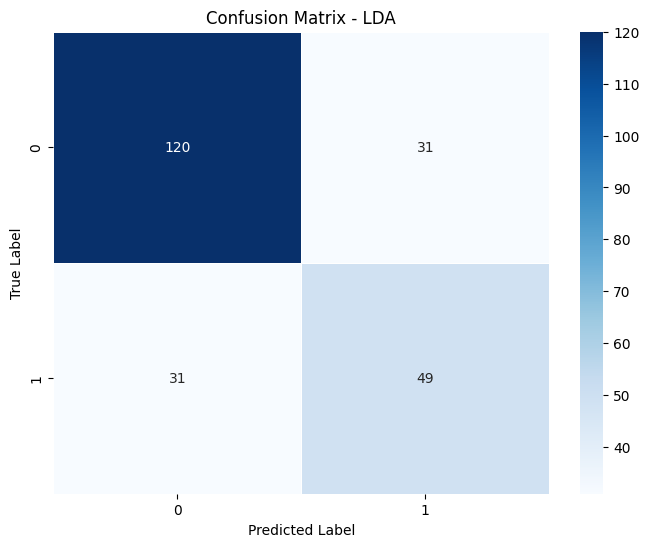



Results for Naïve Bayes:
Confusion Matrix:
 [[119  32]
 [ 27  53]]
Accuracy: 0.7445887445887446
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



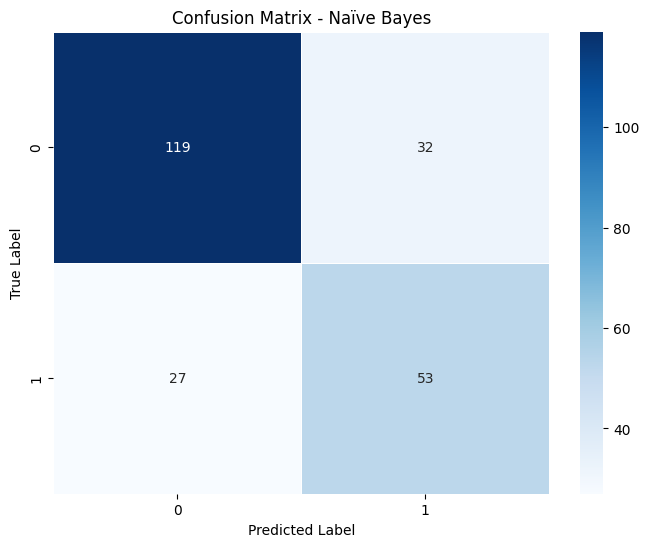



Results for KNN:
Confusion Matrix:
 [[118  33]
 [ 41  39]]
Accuracy: 0.6796536796536796
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.78      0.76       151
           1       0.54      0.49      0.51        80

    accuracy                           0.68       231
   macro avg       0.64      0.63      0.64       231
weighted avg       0.67      0.68      0.68       231



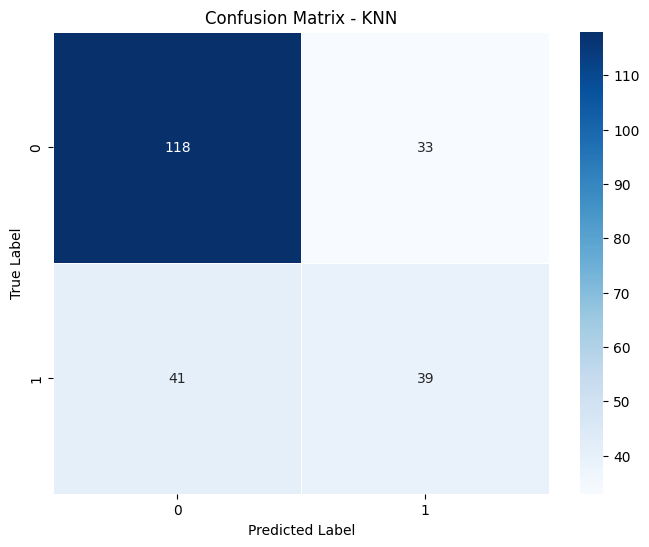



Results for Decision Tree:
Confusion Matrix:
 [[110  41]
 [ 27  53]]
Accuracy: 0.7056277056277056
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.73      0.76       151
           1       0.56      0.66      0.61        80

    accuracy                           0.71       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.71      0.71       231



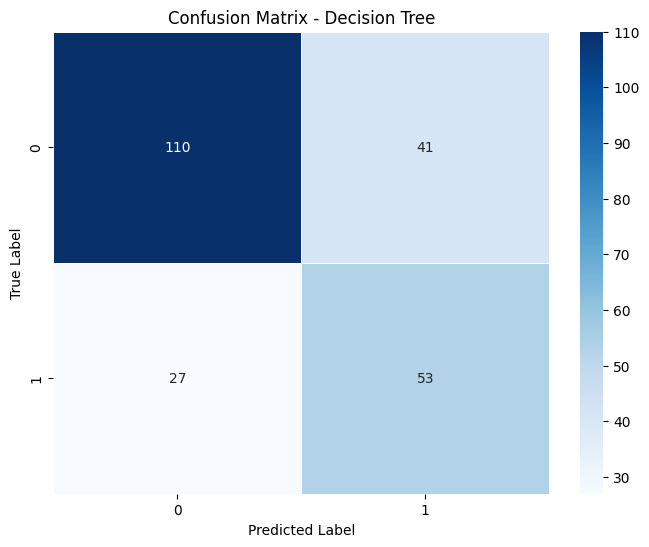



Results for Logistic Regression:
Confusion Matrix:
 [[127  24]
 [ 35  45]]
Accuracy: 0.7445887445887446
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       151
           1       0.65      0.56      0.60        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



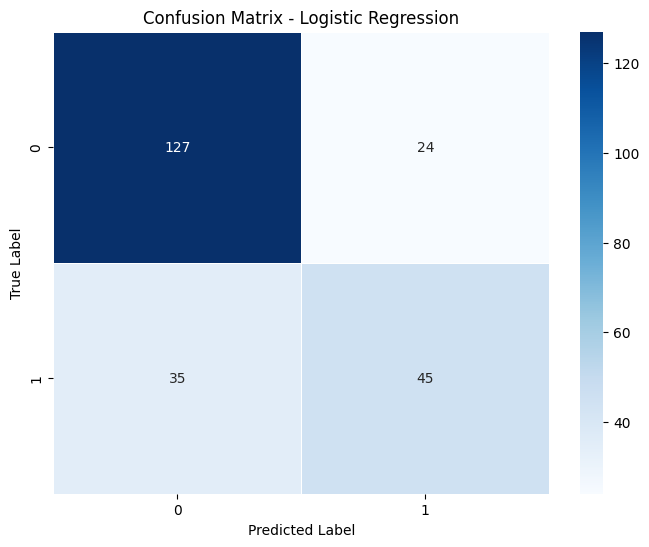

In [ ]:
#Question4: apply five machine learning algorithms (LDA, Naïve Bayes, KNN, Decision Tree, Logistic Regression)
#and summarize the performance on test sets (display confusion matrix, report accuracy and also display classification report)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Initialize the classifiers
lda_classifier = LinearDiscriminantAnalysis()
nb_classifier = GaussianNB()
knn_classifier = KNeighborsClassifier()
dt_classifier = DecisionTreeClassifier()
lr_classifier = LogisticRegression()

# Train the classifiers on the training data
lda_classifier.fit(X_train, y_train)
nb_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)
lr_classifier.fit(X_train, y_train)

# Make predictions on the test data
lda_predictions = lda_classifier.predict(X_test)
nb_predictions = nb_classifier.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)
dt_predictions = dt_classifier.predict(X_test)
lr_predictions = lr_classifier.predict(X_test)

# Evaluate performance and display results
classifiers = [
    ("LDA", lda_predictions),
    ("Naïve Bayes", nb_predictions),
    ("KNN", knn_predictions),
    ("Decision Tree", dt_predictions),
    ("Logistic Regression", lr_predictions)
]

for name, predictions in classifiers:
    print(f"Results for {name}:")
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    print("\n" + "="*50 + "\n")


In [ ]:
#Question5: which algorithm is best.
LDA and Naïve Bayes perform the best on this downsampled dataset based on accuracy alone.
However, other metrics should be considered, especially in imbalanced datasets.
LDA and Naïve Bayes also perform well considering these other metrics. The choice of algorithm depends on your application's requirements and other factors like interpretability, efficiency, and optimization potential.

Class distribution after downsampling:
 1    188
0    188
Name: Class_variable, dtype: int64
Results for LDA on the downsampled dataset:
Confusion Matrix:
 [[106  45]
 [ 23  57]]
Accuracy: 0.7056277056277056
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.70      0.76       151
           1       0.56      0.71      0.63        80

    accuracy                           0.71       231
   macro avg       0.69      0.71      0.69       231
weighted avg       0.73      0.71      0.71       231



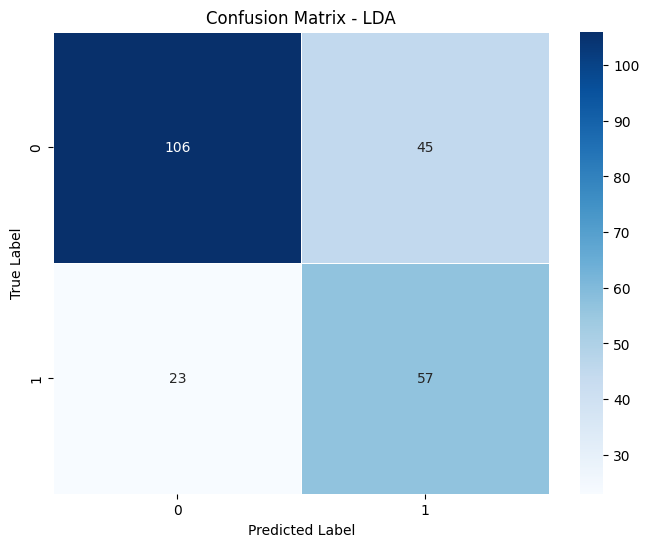



Results for Naïve Bayes on the downsampled dataset:
Confusion Matrix:
 [[110  41]
 [ 27  53]]
Accuracy: 0.7056277056277056
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.73      0.76       151
           1       0.56      0.66      0.61        80

    accuracy                           0.71       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.71      0.71       231



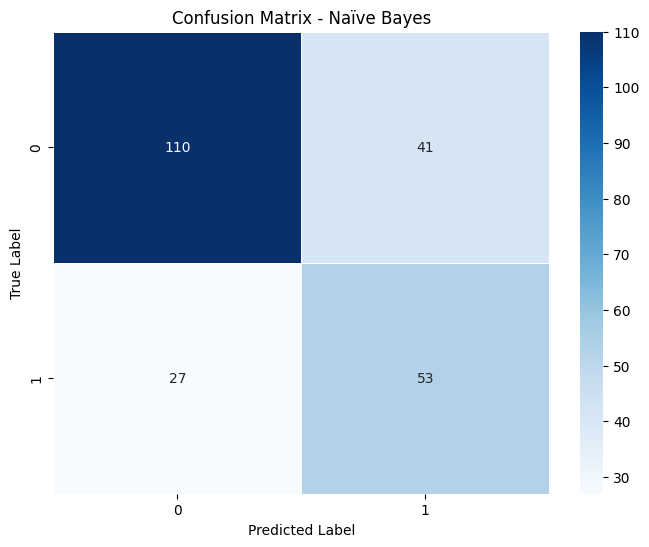



Results for KNN on the downsampled dataset:
Confusion Matrix:
 [[104  47]
 [ 27  53]]
Accuracy: 0.6796536796536796
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.69      0.74       151
           1       0.53      0.66      0.59        80

    accuracy                           0.68       231
   macro avg       0.66      0.68      0.66       231
weighted avg       0.70      0.68      0.69       231



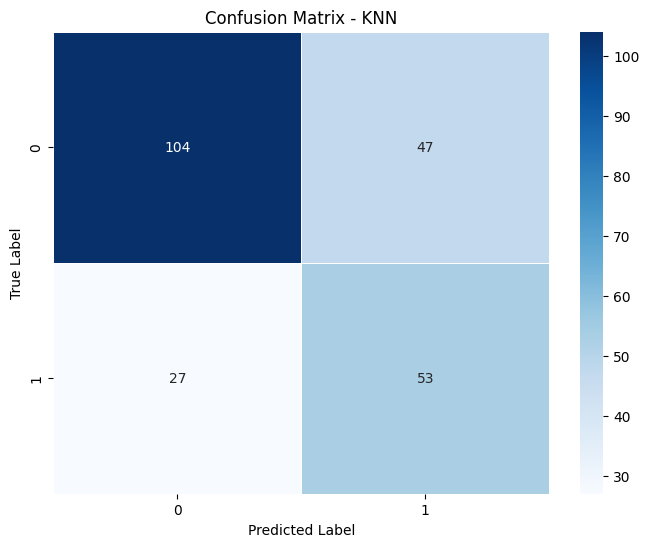



Results for Decision Tree on the downsampled dataset:
Confusion Matrix:
 [[100  51]
 [ 22  58]]
Accuracy: 0.683982683982684
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.66      0.73       151
           1       0.53      0.72      0.61        80

    accuracy                           0.68       231
   macro avg       0.68      0.69      0.67       231
weighted avg       0.72      0.68      0.69       231



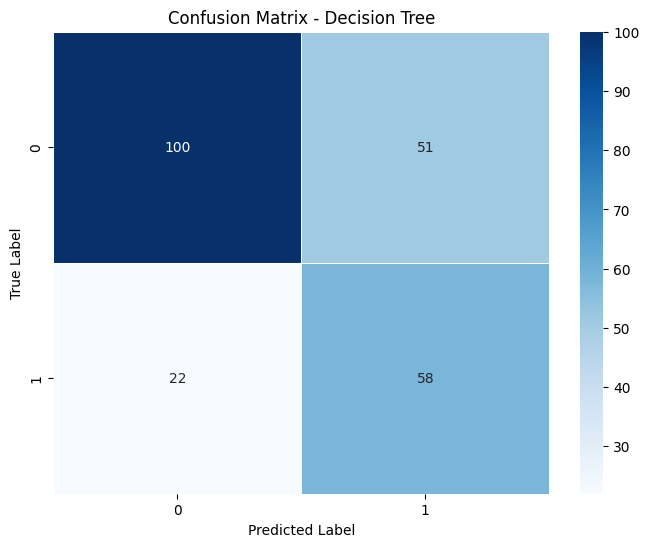



Results for Logistic Regression on the downsampled dataset:
Confusion Matrix:
 [[107  44]
 [ 26  54]]
Accuracy: 0.696969696969697
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.71      0.75       151
           1       0.55      0.68      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.70       231



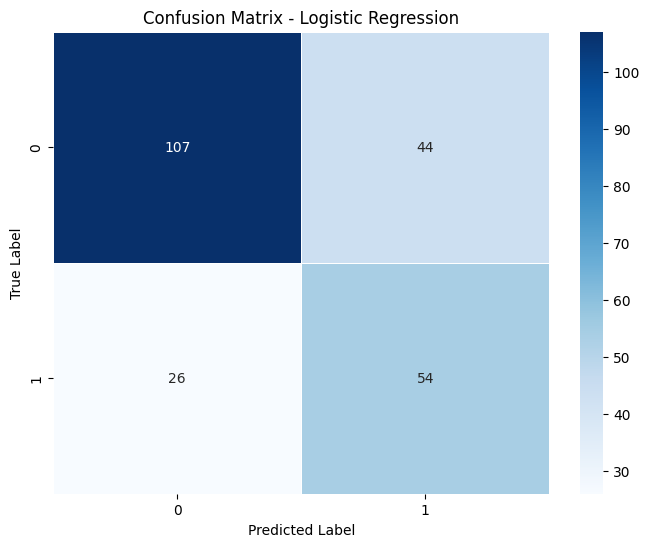

In [ ]:
#Question7
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming 'normalized_dataset' is the DataFrame containing your normalized data.
# You may need to replace it with the actual variable name you used.

# Extract the features (X) and the target variable (y)
X = normalized_dataset.drop('Class_variable', axis=1)
y = normalized_dataset['Class_variable']

# Split the data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Concatenate the features and labels for easier manipulation
train_data = pd.concat([X_train, y_train], axis=1)

# Separate the majority and minority classes
majority_class = train_data[train_data['Class_variable'] == 0]
minority_class = train_data[train_data['Class_variable'] == 1]

# Downsample the majority class to match the number of instances in the minority class
downsampled_majority = resample(majority_class,
                                replace=False,  # Sample without replacement
                                n_samples=len(minority_class),  # Match the minority class size
                                random_state=42)  # Set a random seed for reproducibility

# Combine the downsampled majority class with the minority class
downsampled_data = pd.concat([downsampled_majority, minority_class])

# Shuffle the downsampled data
downsampled_data = downsampled_data.sample(frac=1, random_state=42)

# Separate features and labels after downsampling
X_train_downsampled = downsampled_data.drop('Class_variable', axis=1)
y_train_downsampled = downsampled_data['Class_variable']

# Display the new class distribution
print("Class distribution after downsampling:\n", y_train_downsampled.value_counts())

# Initialize the classifiers
lda_classifier = LinearDiscriminantAnalysis()
nb_classifier = GaussianNB()
knn_classifier = KNeighborsClassifier()
dt_classifier = DecisionTreeClassifier()
lr_classifier = LogisticRegression()

# Train the classifiers on the downsampled training data
lda_classifier.fit(X_train_downsampled, y_train_downsampled)
nb_classifier.fit(X_train_downsampled, y_train_downsampled)
knn_classifier.fit(X_train_downsampled, y_train_downsampled)
dt_classifier.fit(X_train_downsampled, y_train_downsampled)
lr_classifier.fit(X_train_downsampled, y_train_downsampled)

# Make predictions on the test data
lda_predictions_downsampled = lda_classifier.predict(X_test)
nb_predictions_downsampled = nb_classifier.predict(X_test)
knn_predictions_downsampled = knn_classifier.predict(X_test)
dt_predictions_downsampled = dt_classifier.predict(X_test)
lr_predictions_downsampled = lr_classifier.predict(X_test)

# Evaluate performance and display results on the downsampled dataset
classifiers_downsampled = [
    ("LDA", lda_predictions_downsampled),
    ("Naïve Bayes", nb_predictions_downsampled),
    ("KNN", knn_predictions_downsampled),
    ("Decision Tree", dt_predictions_downsampled),
    ("Logistic Regression", lr_predictions_downsampled)
]

for name, predictions in classifiers_downsampled:
    print(f"Results for {name} on the downsampled dataset:")
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))

     # Plot the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    print("\n" + "="*50 + "\n")
